In [41]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import matplotlib.pyplot as plt

import peak_counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
toy_example = np.array([[0, 0, 0, 10, 0, 0, 0, 0, 0],
                        [0, 0, 0, 10, 7, 0, 0, 0, 0],
                        [0, 0, 7, 10, 10, 9, 0, 0, 0],
                        [0, 2, 3, 10, 8, 0, 0, 0, 0],
                        [0, 2, 2, 10, 2, 0, 0, 0, 0]])

In [111]:
peaks, locations = peak_counter.count_peaks(toy_example, window_size=2)
print(peaks)
print(locations)

1
[3]


5 peaks at [317, 602, 648, 724, 897]


<Figure size 432x288 with 0 Axes>

<Figure size 2880x21600 with 0 Axes>

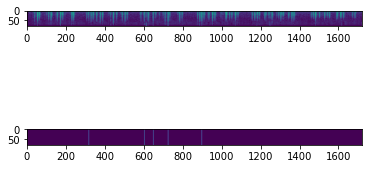

In [180]:
# 44.1 sample
datap = '../data'
#path44 = "features/hammer_44100/melspec_10s_44100hz/video_00159_mel.npy"
#path44= 'features/ASMR/ASMR_Brain_3D_Tapping/melspec_10s_44100hz/ASMR_Brain_Penetrating_3D_Tapping_No_Talking-21-of-240_mel.npy'
#path44 = "features/ASMR/asmr_both_vids/melspec_10s_44100hz/The_Ultiimate_Tapping_ASMR_3_Hours_No_Talking-910-of-1165_mel.npy"
path44 = "features/ASMR/asmr_both_vids/melspec_10s_44100hz/ASMR_Addictive_Tapping_1_Hr_No_Talking-364-of-365_mel.npy"
path44 = os.path.join(datap, path44)
assert os.path.exists(path44)
mel44 = np.load(path44)
peak_viz = np.zeros_like(mel44)
peaks, locations = peak_counter.count_peaks(mel44, window_size=4, floor=30., delta=0.0)
# Mark all peaks with a 1
peak_viz[:,locations] = 1
print('%d peaks at %r' % (peaks, locations))
# plot it out
plt.clf()
plt.figure(figsize=(40, 300))
_, ax = plt.subplots(2,1)
ax[0].imshow(mel44)
ax[1].imshow(peak_viz)
plt.show()